# Prueba Intertrimestral

Nombre y Apellidos: Pilar Folque

Tiempo de la prueba: 1h y 45 mins

Asignatura: Desarrollo de Aplicaciones para la Visualización de Datos

Fecha: 14 de octubre de 2024

Instrucciones:

- Herramientas Sugeridas: Python (pandas, matplotlib, seaborn, scikit-learn).

- Evaluación: Se valorará la capacidad para interpretar los resultados y la claridad en la exposición de las conclusiones.

- Materiales permitidos: Materiales de clase. Internet para búsqueda de dudas y documentación.

- Prohibido: Mingún tipo de LLM, ni mensajería instantánea.

- Formato de Entrega: Los estudiantes deben presentar su trabajo en formato de notebook (por ejemplo, Jupyter Notebook), con gráficos y explicaciones detalladas.

- Entrega: Subir .ipynb y PDF a Github. Enviar resultados al siguiente enlace. Para crear PDF: File -> Print -> Destination as PDF

## [Entrega aquí el examen](https://forms.gle/gU7aKkzE7didZpYV7)




Carga aquí las librerías que creas que vayas a utilizar:

In [74]:
import pandas as pd
import numpy as np
import sklearn.datasets


import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error,
    classification_report,
    confusion_matrix
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier, LogisticRegression
import matplotlib.pyplot as plt

# Ejercicio 1: Programación (2 puntos)

a) Crea una función que calcule y devuelva el valor de la iteración $n+1$ del mapa logístico dada la fórmula:

$x_{n+1}=r⋅x_n⋅(1−x_n)$

donde:

- $r$ es la tasa de crecimiento
- $x_n$ es el valor de la iteración anterior.

La función debe aceptar como parámetros $r$ y $x_n$ (valor inicial). (0.6 puntos)


In [7]:
def programacion(r,xn):

    xn1=r*xn*(1-xn)
    return xn1
programacion(1,2)

-2

b) Crea una función que genere una lista con las primeras n iteraciones del mapa logístico, utilizando la función anterior. (0.6 puntos)

In [8]:
#generar lista primeras n iteraciones del mapa logistico
def listaniteraciones(n,r,xn):
    lista=[]
    #en cada iteracion calcular el valor y guardarlo en la llista
    #recorrer lista n veces
    for i in range(n):
        xn1= programacion(r,xn)
        lista.append(xn1)
    return lista
listaniteraciones(3,1,2)

[-2, -2, -2]

c) Guarda en un dataframe las iteraciones del mapa logístico, para $r = \{0, 0.25, 0.5, 0.75, \dots, 4\}$ y semilla $x_0 = 0.2$. El dataframe debe tener tres columnas: $r$, $n$ y $x_{n+1}$. Muestra los 10 primeros resultados (0.6 puntos)

In [9]:
#guardar en un dataframe las iteraciones del mapa logistico
#la r va cambiando {0,0.25,0.5,0.75,…,4}
# semilla  𝑥0=0.2
#dataframe con tres columnas

df = pd.DataFrame(columns=['r', 'n', 'xn1'])


In [13]:
4/0.25

16.0

In [19]:
r=[]
n=0.25
r.append(n)
for i in range(0,16):
    n+=0.25
    r.append(n)
    #print(r[i])
#print(r)
        

In [27]:
xn=0.2
for i in range(len(r)):
    xn= programacion(r[i],xn)
    df.loc[i] = [r[i], i, xn]

In [30]:
df.head(10)

,r,n,xn1
0,0.25,0.0,0.040000
1,0.50,1.0,0.019200
2,0.75,2.0,0.014124
3,1.00,3.0,0.013924
4,1.25,4.0,0.017163
5,1.50,5.0,0.025302
6,1.75,6.0,0.043159
7,2.00,7.0,0.082592
8,2.25,8.0,0.170483
9,2.50,9.0,0.353547


d) ¿Cómo se podría programar en una clase las dos funciones anteriores para calcular y almacenar iteraciones del mapa logístico? Proporciona la implementación de la clase con un método para obtener el valor de una iteración específica, otro método para generar la lista completa de iteraciones y otro para crear un gráfico que visualice el $r$ y $x_{n+1}$. (0.2 puntos)

In [33]:
class data():
    def __init__(self):
        #obtener valor iteracion especifica
        #generar lista completa iteraciones
        #generar grafico que visualice
        #dos atributos: la iteracion y la lista
        lista=[]
        self.lista=lista
        self.iteracion=None
        
    def programacion(self,r,xn):
        xn1=r*xn*(1-xn)
        return xn1
    
    def listaniteraciones(self,n,r,xn):
        lista=[]
        #en cada iteracion calcular el valor y guardarlo en la llista
        #recorrer lista n veces
        for i in range(self,n):
            xn1= programacion(r,xn)
            lista.append(xn1)
        return lista
    
    def plot(self,r,xn1):
        plt.plot(r, xn1, color='blue', marker='o', linestyle='--', linewidth=2, markersize=8)
        plt.xlabel('Eje r')
        plt.ylabel('Eje xn1')
        plt.grid(True)
        plt.show()
        

# Ejercicio 2: Exploración y comprensión (3 puntos)

a) Describe las principales variables del dataset proporcionado. ¿Qué información aportan y qué tipo de datos contiene cada una? ¿Existen valores faltantes en el dataset? Si es así, ¿en qué variables? ¿Qué propones para resolverlo? (1 puntos)


In [41]:
dataset=pd.read_csv("Walmart.csv")
print(dataset.head())


   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


In [42]:
print(dataset.shape)


(6435, 8)


In [48]:
print(dataset.dtypes)

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object


Se trata de un conjunto de 8 variable de tipo entero,float u objecy.

In [43]:
print(dataset.isna().sum())


Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    1
dtype: int64


In [50]:
dataset.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    1
dtype: int64

Solo hay na en la variable unemployment.
Para resolver lo de los valores faltando hacer: .dropna


In [53]:
dataset = dataset.dropna()
#print(dataset.isna().sum())
print(dataset.shape)

(6434, 8)


b) Realiza un gráfico de barras que responda las siguientes preguntas. ¿Cuántas tiendas $Store$ están presentes en el dataset? ¿Cuál es la media de ventas semanales $Weekly Sales$ por tienda? ¿Qué tiendas tienen las ventas promedio más altas y más bajas? (1 puntos)



In [ ]:
#grafico de barras
#numero de tiendas store
#media de ventas semana Weeklysales por tieda
#tiendas con ventas promedio más altas y más bajas

In [52]:
print(dataset.head())

   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


In [57]:
dataset.describe(include='all')

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6434.000000,6434,6.434000e+03,6434.000000,6434.000000,6434.000000,6434.000000,6434.000000
unique,NaN,143,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,05-02-2010,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,45,NaN,NaN,NaN,NaN,NaN,NaN
mean,22.996581,NaN,1.047016e+06,0.069941,60.664434,3.358512,171.575168,7.999047
std,12.986295,NaN,5.643956e+05,0.255067,18.446292,0.458992,39.358921,1.876012
min,1.000000,NaN,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,NaN,5.531677e+05,0.000000,47.445000,2.933000,131.735000,6.891000
50%,23.000000,NaN,9.608457e+05,0.000000,62.675000,3.445000,182.616521,7.874000
75%,34.000000,NaN,1.420282e+06,0.000000,74.945000,3.735000,212.745096,8.622000


In [60]:
stores= 6434 


In [130]:
weeklysale = int(1.047016e+06)
#weeklysale.round(weeklysale,1)
weeklysale

1047016

In [134]:
ventaalta=int(3.818686e+06)
ventaalta

3818686

In [135]:
ventabaja=int(2.099862e+05)
ventabaja

209986

In [137]:
#fig = px.histogram(df, x="streams",
                  # labels = {"streams": "Reproducciones"},
                  # histnorm='probability density',
                  # nbins = 100,
                 #  opacity=0.6)

#fig.update_traces(marker_color = "darkorange")
#fig.show()

ValueError: x and y must have same first dimension, but have shapes (5,) and (4,)

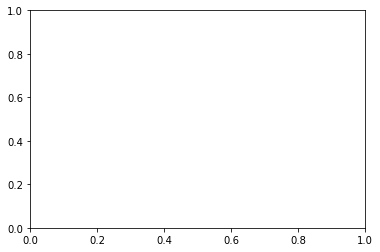

In [133]:
muestra=[stores,weeklysale,ventaalta,ventabaja]
x=[0,1,2,3,4]
plt.plot(x, muestra, color='blue', marker='o', linestyle='--', linewidth=2, markersize=8)
plt.xlabel('Eje y')
plt.ylabel('Eje x')
plt.grid(True)
plt.show()

c) Genera un gráfico de líneas que muestre la evolución de las ventas semanales $Weekly Sales$ a lo largo del tiempo para la tienda con más ventas totales. ¿Observas algún patrón estacional o tendencia? (1 puntos)

In [75]:
y=dataset['Weekly_Sales']
x=dataset['Date']

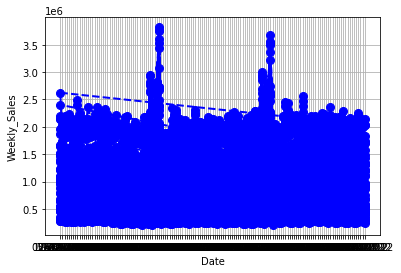

In [77]:
plt.plot(x, y, color='blue', marker='o', linestyle='--', linewidth=2, markersize=8)
plt.xlabel('Date')
plt.ylabel('Weekly_Sales')
plt.grid(True)
plt.show()

Hay dos altos picos de compras.

# Ejrcicio 3: Análisis de Factores Externos (2 puntos)

a) Explora la relación entre el precio de combustible $Fuel Price$, la tasa de desempleo $Unemployment$ y las ventas semanales $Weekly Sales$. ¿Existe alguna correlación significativa? Genera dos gráficos de dispersión (scatter plot) para ilustrarlo. (1 puntos)

Variance explanation R^2 = 0.0
Coefficients: 
 [-9.13288161e-03  3.47583846e-10]
Mean squared error: 0.21
Coefficient of determination: 0.00


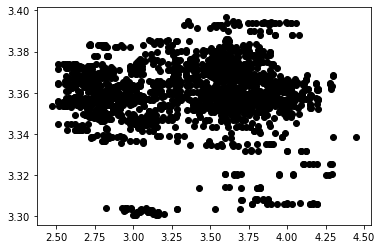

In [84]:
y= dataset['Fuel_Price']
X=dataset[['Unemployment','Weekly_Sales']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

regr = LinearRegression().fit(X_train, y_train)
print("Variance explanation R^2 = {}".format(round(regr.score(X, y),2)))

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(y_test, y_pred, color="black")
# plt.plot(X_test, y_pred, color="blue", linewidth=3)


plt.show()

No existe ningun tipo de correlación linear

c) Compara las ventas promedio de las semanas festivas $Holiday Flag = 1$ con las semanas no festivas $Holiday Flag = 0$. ¿Cuál es la diferencia promedio de ventas entre estos dos tipos de semanas? ¿Existe una diferencia estdísticamente significativa? (1 puntos)


In [86]:
print(dataset.head())

   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


In [94]:
dataset['hf1']=dataset['Holiday_Flag']==1
dataset['hf0']=dataset['Holiday_Flag']==0
print(dataset.describe(include='all'))

              Store        Date  Weekly_Sales  Holiday_Flag  Temperature  \
count   6434.000000        6434  6.434000e+03   6434.000000  6434.000000   
unique          NaN         143           NaN           NaN          NaN   
top             NaN  05-02-2010           NaN           NaN          NaN   
freq            NaN          45           NaN           NaN          NaN   
mean      22.996581         NaN  1.047016e+06      0.069941    60.664434   
std       12.986295         NaN  5.643956e+05      0.255067    18.446292   
min        1.000000         NaN  2.099862e+05      0.000000    -2.060000   
25%       12.000000         NaN  5.531677e+05      0.000000    47.445000   
50%       23.000000         NaN  9.608457e+05      0.000000    62.675000   
75%       34.000000         NaN  1.420282e+06      0.000000    74.945000   
max       45.000000         NaN  3.818686e+06      1.000000   100.140000   

         Fuel_Price          CPI  Unemployment    hf1   hf0  
count   6434.000000  6434

# Ejercicio 4: Modelado predictivo (2 puntos)

a) Encuentra el mejor modelo de regresión lineal para predecir las ventas semanales $Weekly Sales$ en función de las variables disponibles. Prueba múltiples combinaciones de variables. (1.5 puntos)


Variance explanation R^2 = 0.0
Coefficients: 
 [-9.13288161e-03  3.47583846e-10]
Mean squared error: 0.21
Coefficient of determination: 0.00


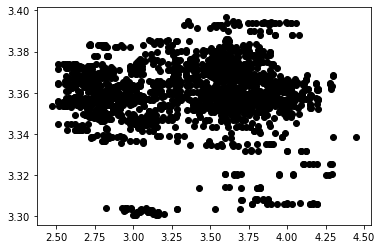

In [126]:
y= dataset['Fuel_Price']
X=dataset[['Unemployment','Weekly_Sales']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

regr = LinearRegression().fit(X_train, y_train)
print("Variance explanation R^2 = {}".format(round(regr.score(X, y),2)))

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(y_test, y_pred, color="black")
# plt.plot(X_test, y_pred, color="blue", linewidth=3)


plt.show()

Variance explanation R^2 = 0.14
Coefficients: 
 [-15342.1547164    -991.7442068    8744.85875477  -2311.75041965
 -21183.38633471]
Mean squared error: 267587632687.32
Coefficient of determination: 0.15


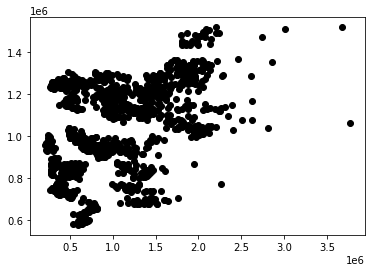

In [107]:
X = dataset[['Store','Temperature','Fuel_Price','CPI','Unemployment']]#he puesto aquellas que fuesen continuas
y = dataset['Weekly_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
regr = LinearRegression().fit(X_train, y_train)
print("Variance explanation R^2 = {}".format(round(regr.score(X, y),2)))
# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(y_test, y_pred, color="black")
# plt.plot(X_test, y_pred, color="blue", linewidth=3)


plt.show()

Variance explanation R^2 = 0.02
Coefficients: 
 [  -795.93177875  -2605.39229347  -1571.49296957 -40052.82162906]
Mean squared error: 306151659053.78
Coefficient of determination: 0.03


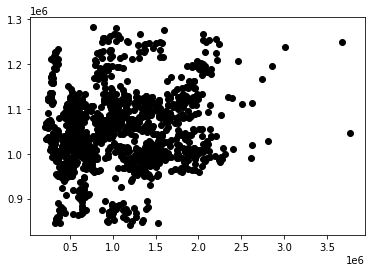

In [108]:
#Quito Store
X = dataset[['Temperature','Fuel_Price','CPI','Unemployment']]#he puesto aquellas que fuesen continuas
y = dataset['Weekly_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
regr = LinearRegression().fit(X_train, y_train)
print("Variance explanation R^2 = {}".format(round(regr.score(X, y),2)))
# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(y_test, y_pred, color="black")
# plt.plot(X_test, y_pred, color="blue", linewidth=3)


plt.show()

In [110]:
#No tiene sentido quitar store

Variance explanation R^2 = 0.14
Coefficients: 
 [-15316.97422542    526.00741649  -2438.40511309 -23066.57892544]
Mean squared error: 268312408590.64
Coefficient of determination: 0.15


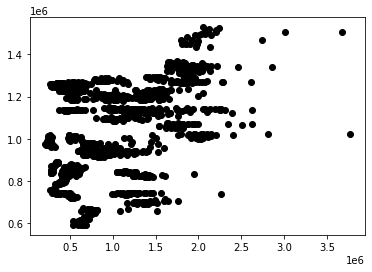

In [109]:
X = dataset[['Store','Fuel_Price','CPI','Unemployment']]#he puesto aquellas que fuesen continuas
y = dataset['Weekly_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
regr = LinearRegression().fit(X_train, y_train)
print("Variance explanation R^2 = {}".format(round(regr.score(X, y),2)))
# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(y_test, y_pred, color="black")
# plt.plot(X_test, y_pred, color="blue", linewidth=3)


plt.show()

In [111]:
#Temperature es muy posible que haya que quitarla

Variance explanation R^2 = 0.14
Coefficients: 
 [-15334.12130706   -946.50847577  -2336.31321207 -21477.91984302]
Mean squared error: 267582355423.86
Coefficient of determination: 0.15


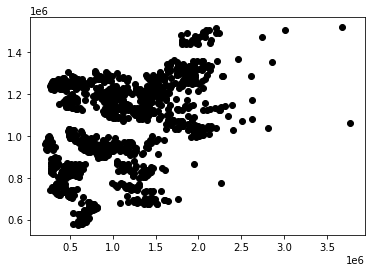

In [112]:
X = dataset[['Store','Temperature','CPI','Unemployment']]#he puesto aquellas que fuesen continuas
y = dataset['Weekly_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
regr = LinearRegression().fit(X_train, y_train)
print("Variance explanation R^2 = {}".format(round(regr.score(X, y),2)))
# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(y_test, y_pred, color="black")
# plt.plot(X_test, y_pred, color="blue", linewidth=3)


plt.show()

In [113]:
#Fuel_price también

Variance explanation R^2 = 0.14
Coefficients: 
 [-15334.12130706   -946.50847577  -2336.31321207 -21477.91984302]
Mean squared error: 267582355423.86
Coefficient of determination: 0.15


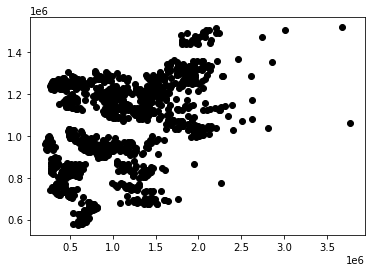

In [114]:
X = dataset[['Store','Temperature','CPI','Unemployment']]#he puesto aquellas que fuesen continuas
y = dataset['Weekly_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
regr = LinearRegression().fit(X_train, y_train)
print("Variance explanation R^2 = {}".format(round(regr.score(X, y),2)))
# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(y_test, y_pred, color="black")
# plt.plot(X_test, y_pred, color="blue", linewidth=3)


plt.show()

In [115]:
#CPI también

Variance explanation R^2 = 0.12
Coefficients: 
 [-14453.81662849  -2173.6771647   50391.38714349  -6458.40530713]
Mean squared error: 274267407045.50
Coefficient of determination: 0.13


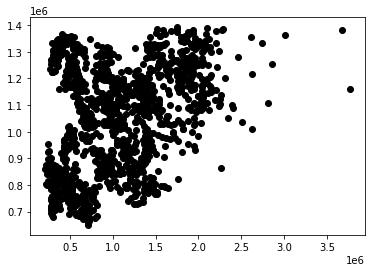

In [116]:
X = dataset[['Store','Temperature','Fuel_Price','Unemployment']]#he puesto aquellas que fuesen continuas
y = dataset['Weekly_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
regr = LinearRegression().fit(X_train, y_train)
print("Variance explanation R^2 = {}".format(round(regr.score(X, y),2)))
# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(y_test, y_pred, color="black")
# plt.plot(X_test, y_pred, color="blue", linewidth=3)


plt.show()

In [ ]:
#Unemployment no

Variance explanation R^2 = 0.11
Coefficients: 
 [-14213.6438591   -9433.76905098]
Mean squared error: 276735989315.76
Coefficient of determination: 0.12


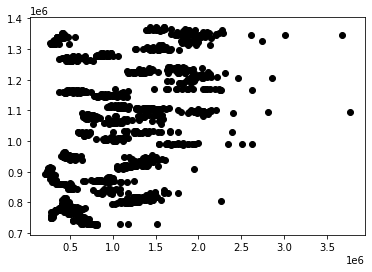

In [117]:
#Quito cpi, fuel price y temperatura
X = dataset[['Store','Unemployment']]#he puesto aquellas que fuesen continuas
y = dataset['Weekly_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
regr = LinearRegression().fit(X_train, y_train)
print("Variance explanation R^2 = {}".format(round(regr.score(X, y),2)))
# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(y_test, y_pred, color="black")
# plt.plot(X_test, y_pred, color="blue", linewidth=3)


plt.show()

In [118]:
#Mucho peor

In [120]:
dataset['multiplicación']=dataset['Fuel_Price']*dataset['CPI']

Variance explanation R^2 = 0.13
Coefficients: 
 [-14850.91724032   -960.13061098 -18626.16555623   -480.86639893]
Mean squared error: 270695122916.89
Coefficient of determination: 0.14


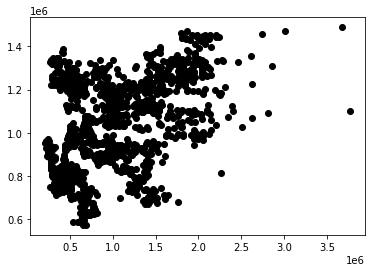

In [121]:
#fuel price*cpi

X = dataset[['Store','Temperature','Unemployment','multiplicación']]#he puesto aquellas que fuesen continuas
y = dataset['Weekly_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
regr = LinearRegression().fit(X_train, y_train)
print("Variance explanation R^2 = {}".format(round(regr.score(X, y),2)))
# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(y_test, y_pred, color="black")
# plt.plot(X_test, y_pred, color="blue", linewidth=3)


plt.show()

Variance explanation R^2 = 0.14
Coefficients: 
 [ -15376.52552123   19781.62206932    -803.96691519 -292122.78437385
   -8343.19995802  -20755.81663286   19781.62206931  -19781.62206931
    1795.55565528]
Mean squared error: 265771821949.79
Coefficient of determination: 0.16


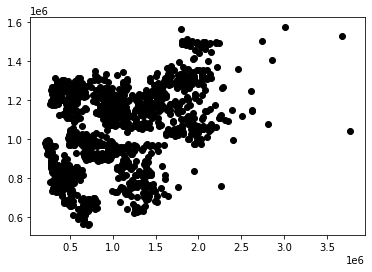

In [125]:
#Voy a hacer la de todos menos Date que da problemas
X = dataset.drop(columns=['Weekly_Sales','Date'])  # Características
y = dataset['Weekly_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
regr = LinearRegression().fit(X_train, y_train)
print("Variance explanation R^2 = {}".format(round(regr.score(X, y),2)))
# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(y_test, y_pred, color="black")
# plt.plot(X_test, y_pred, color="blue", linewidth=3)


plt.show()

b) Compara los modelos evalúando el R² y el error cuadrático medio (MSE). ¿Cuál es el modelo con mejores métricas? (0.5 puntos)


Se ve que el mejor modelo tiene una R^2 de 0.14 y un Mean squared error: 265771821949.79 siendo este el último modelo ejecutado con todas las variables menos Date.


# Ejercicio 5: Conclusiones y Recomendaciones (1 punto)

a) Redacta un informe de máximo 500 palabras resumiendo los principales hallazgos del análisis de datos y la modelización. Incluye tus conclusiones sobre qué factores influyen más en las ventas y recomendaciones para la empresa basadas en el análisis.

Después de haber desarrollado todos estos análisis sobre los datos, he podido llegar a diferentes conclusiones sobre las ventas.
Se pueda observar en este último apartado que las variables que más explican el modelo son 'Store' y 'Unemployment'. Además de las fecha como se puede ver en graafico lineal de "Date" vs "Weekly_Sales."
Además, de que el "Fuel_Price" no está relacionado con el 'Unemployment' y el 'Weekly_Sales'